In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Imports

In [ ]:
!pip install -q git+https://github.com/miladmozafari/SpykeTorch.git

  Preparing metadata (setup.py) ... done


In [ ]:
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd
import imageio
import os
import ast
import sys

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import ImageFolder
from torch.nn.parameter import Parameter
import torchvision
import numpy as np
from SpykeTorch import snn
from SpykeTorch import functional as sf
from SpykeTorch import visualization as vis
from SpykeTorch import utils
from torchvision import transforms

dir = '/content/drive/MyDrive/Thesis/'
cifar_dir = '/content/drive/MyDrive/Thesis/Data/extracted'

## Processing

In [ ]:
# kernels = [	utils.GaborKernel(window_size = 3, orientation = 45+22.5),
#             utils.GaborKernel(3, 90+22.5),
#             utils.GaborKernel(3, 135+22.5),
#             utils.GaborKernel(3, 180+22.5)]

# kernels = [ utils.DoGKernel(4,4/10,7/10),
#             utils.DoGKernel(4,7/10,4/10),
#             utils.DoGKernel(8,8/9,14/10),
#             utils.DoGKernel(8,17/10,8/10)]

# filter = utils.Filter(kernels, use_abs = True)

# transform = transforms.Compose(
#     [transforms.Grayscale(),
#     transforms.ToTensor(),
#     filter])

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

## Load Dataset

In [ ]:
CIFAR_train = utils.CacheDataset(torchvision.datasets.CIFAR10(root=cifar_dir, train=True, download=True, transform = transform))
CIFAR_test = utils.CacheDataset(torchvision.datasets.CIFAR10(root=cifar_dir, train=False, download=True, transform = transform))
CIFAR_loader = DataLoader(CIFAR_train, batch_size=5, shuffle=False)
CIFAR_testLoader = DataLoader(CIFAR_test, batch_size=len(CIFAR_test), shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
images, labels = next(CIFAR_loader.__iter__())  

images[0].shape

torch.Size([3, 32, 32])

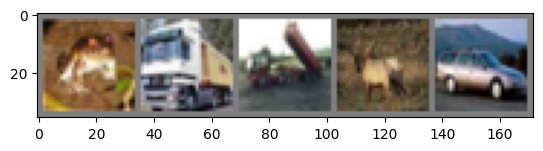

frog  truck truck deer  car  


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(CIFAR_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(5)))

# Model

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.pool = nn.MaxPool2d(2, 2)

        self.conv1 = nn.Conv2d(3, 90, 3)
        self.conv2 = nn.Conv2d(90, 145, 2)
        self.conv3 = nn.Conv2d(145, 281, 2)
        self.conv4 = nn.Conv2d(281, 50, 5)
        self.fc1 = nn.Linear(50 * 2 * 2, 10)


    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = F.relu(self.conv2(x))
        x = self.pool(F.relu(self.conv3(x)))
        x = F.relu(self.conv4(x))
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        return x


net = Net()

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.04, momentum=0.0)

In [ ]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(CIFAR_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.868
[1,  4000] loss: 1.541
[1,  6000] loss: 1.360
[1,  8000] loss: 1.278
[1, 10000] loss: 1.185
[2,  2000] loss: 1.100
[2,  4000] loss: 1.068
[2,  6000] loss: 0.972
[2,  8000] loss: 0.963
[2, 10000] loss: 0.905
[3,  2000] loss: 0.871
[3,  4000] loss: 0.854
[3,  6000] loss: 0.811
[3,  8000] loss: 0.804
[3, 10000] loss: 0.767
[4,  2000] loss: 0.765
[4,  4000] loss: 0.746
[4,  6000] loss: 0.714
[4,  8000] loss: 0.711
[4, 10000] loss: 0.688
[5,  2000] loss: 0.685
[5,  4000] loss: 0.707
[5,  6000] loss: 0.667
[5,  8000] loss: 0.688
[5, 10000] loss: 0.676
[6,  2000] loss: 0.657
[6,  4000] loss: 0.666
[6,  6000] loss: 0.655
[6,  8000] loss: 0.667
[6, 10000] loss: 0.634
[7,  2000] loss: 0.657
[7,  4000] loss: 0.646
[7,  6000] loss: 0.629
[7,  8000] loss: 0.667
[7, 10000] loss: 0.666
[8,  2000] loss: 0.623
[8,  4000] loss: 0.659
[8,  6000] loss: 0.669
[8,  8000] loss: 0.696
[8, 10000] loss: 0.702
[9,  2000] loss: 0.684
[9,  4000] loss: 0.671
[9,  6000] loss: 0.709
[9,  8000] 

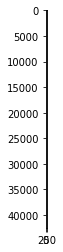

GroundTruth:  cat   ship  ship  plane


In [ ]:
dataiter = iter(CIFAR_testLoader)
images, labels = next(dataiter)


# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in CIFAR_testLoader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 12 %


In [ ]:
PATH = '/content/drive/MyDrive/Thesis/checkpoints/4layer_70.pth'
torch.save(net.state_dict(), PATH)